In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [3]:
data_file = '.\Videos\\monitoring\\2018-12-13-0100_analisis.txt'
data = pd.read_csv(data_file, skiprows=3, skipinitialspace=True)

In [4]:
data

,time,region,#pixels,area(km2),distance(km)
0,2018-12-13-01:00,G001,11061,44244,426
1,2018-12-13-01:00,G002,2907,11628,1342
2,2018-12-13-01:00,G003,2828,11312,988
3,2018-12-13-01:00,G004,1930,7720,1826
4,2018-12-13-01:00,G005,1792,7168,1344
...,...,...,...,...,...
2816,2018-12-15-07:00,M347,1799,7196,605
2817,2018-12-15-07:00,M358,102,408,495
2818,2018-12-15-07:00,M360,29,116,701
2819,2018-12-15-07:00,M361,32,128,493


In [5]:
manual_tracking1 = ['C005','C006','C007','C008','C015','C019','C020','C023','C028','C029','C030','C033','C039','C040','C041','C043','C047',
'C051','C052','C053','C062','C063','C066','C067','C074','C079','C080','C083','C088','C094','C095','C100','C112','C114','C115','C120','C121',
'C123','C124','C126','C128','C133','C143','C148','C170','C171','C172','C175','C178','C179','C184','C185','C186','C187','C188','C194',
 ]
manual_tracking2 = ['C009','C010','C011','C012','C013','C014','C016','C017','C018','C024','C026','C027','C038','C045','C085','C089',]
manual_tracking3 = ['C055','C059']
manual_tracking4 = ['C106','C108','C113',]
manual_tracking5 = ['C180']
manual_tracking6 = ['C189','C190','C191','C192','C196','C197','C200','C201','C204' ]
manual_tracking7 = ['C193','C217','C255','C231','C237','C242','C259','C260']
manual_tracking7_1 = ['C236','C254','C257','C258','C262','C263','C265','C266']


In [6]:
region1 = data.loc[data['region'].isin(manual_tracking1), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region2 = data.loc[data['region'].isin(manual_tracking2), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region3 = data.loc[data['region'].isin(manual_tracking3), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region4 = data.loc[data['region'].isin(manual_tracking4), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region5 = data.loc[data['region'].isin(manual_tracking5), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region6 = data.loc[data['region'].isin(manual_tracking6), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region7 = data.loc[data['region'].isin(manual_tracking7), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region7_1 = data.loc[data['region'].isin(manual_tracking7_1), ['time', 'area(km2)']].groupby(['time']).sum().reset_index()
region1


,time,area(km2)
0,2018-12-13-04:45,2304
1,2018-12-13-05:00,3728
2,2018-12-13-05:15,5296
3,2018-12-13-05:30,6460
4,2018-12-13-05:45,9016
...,...,...
123,2018-12-14-11:45,226008
124,2018-12-14-12:00,196820
125,2018-12-14-12:15,129972
126,2018-12-14-12:30,99808


In [7]:
merge_df = pd.merge(region1,region2, how='left',on='time')

regions_area = region1.merge(
    region2,how='left',on='time', suffixes=('1','2')
    ).merge(
        region3,how='left',on='time', suffixes=('2','3')
        ).merge(
            region4,how='left',on='time', suffixes=('3','4')
            ).merge(
                region5,how='left',on='time', suffixes=('5','6')
                ).merge(
                    region6,how='left',on='time', suffixes=('6','7'))

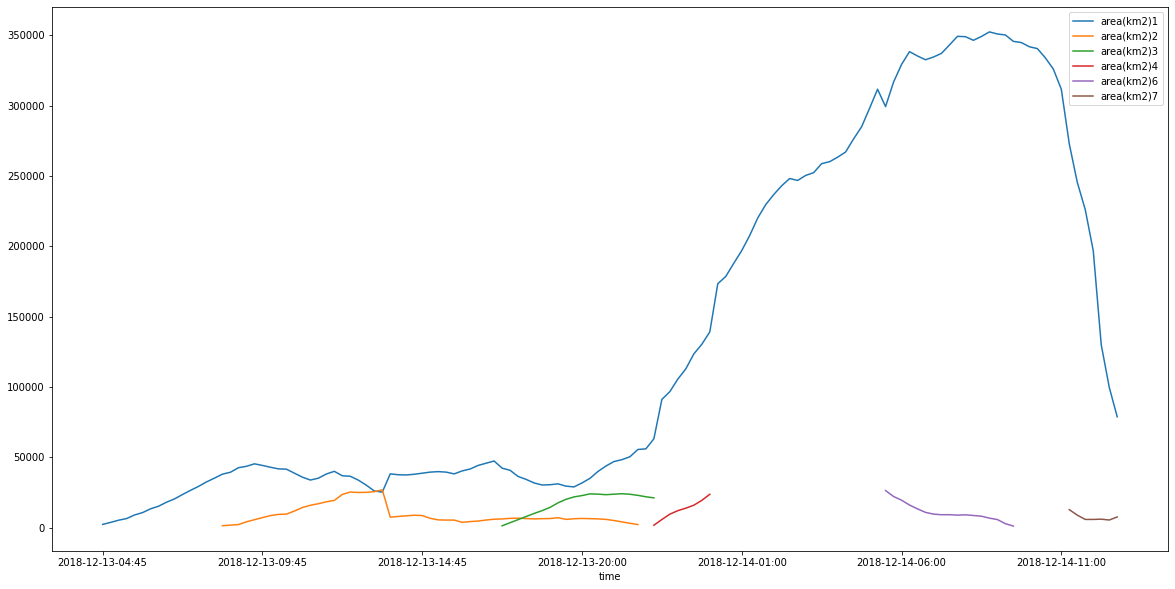

In [18]:
ax = regions_area.plot(x='time', figsize=[20,10])
